### Import Different Libraries

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from warnings import filterwarnings 
filterwarnings("ignore")

### Read the Data

In [5]:
df = pd.read_csv("Electric_Vehicle_Population_Data.csv")

In [6]:
# Display the first few rows of the DataFrame
df.head(5)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


### Dataset Analysis

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [9]:
df.shape

(177866, 17)

In [10]:
df[df.duplicated()]

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract


## Missing Values Imputation

In [12]:
df.isnull().sum()/len(df)

VIN (1-10)                                           0.000000
County                                               0.000028
City                                                 0.000028
State                                                0.000000
Postal Code                                          0.000028
Model Year                                           0.000000
Make                                                 0.000000
Model                                                0.000000
Electric Vehicle Type                                0.000000
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0.000000
Electric Range                                       0.000000
Base MSRP                                            0.000000
Legislative District                                 0.002187
DOL Vehicle ID                                       0.000000
Vehicle Location                                     0.000051
Electric Utility                                     0.000028
2020 Cen

### Numerical Columns Imputation

In [14]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
for i in ["Postal Code","Legislative District","2020 Census Tract"]:
    df[i]= imputer.fit_transform(df[[i]])

In [15]:
df.isnull().sum()/len(df)*100

VIN (1-10)                                           0.000000
County                                               0.002811
City                                                 0.002811
State                                                0.000000
Postal Code                                          0.000000
Model Year                                           0.000000
Make                                                 0.000000
Model                                                0.000000
Electric Vehicle Type                                0.000000
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0.000000
Electric Range                                       0.000000
Base MSRP                                            0.000000
Legislative District                                 0.000000
DOL Vehicle ID                                       0.000000
Vehicle Location                                     0.005060
Electric Utility                                     0.002811
2020 Cen

### Categorical Columns Imputation

In [17]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values = np.nan,
                        strategy = 'most_frequent')

for i in ["County","City","Vehicle Location","Electric Utility"]:
    df[i]=si.fit_transform(df[[i]]).ravel()

In [18]:
df.isnull().sum()/len(df)*100

VIN (1-10)                                           0.0
County                                               0.0
City                                                 0.0
State                                                0.0
Postal Code                                          0.0
Model Year                                           0.0
Make                                                 0.0
Model                                                0.0
Electric Vehicle Type                                0.0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0.0
Electric Range                                       0.0
Base MSRP                                            0.0
Legislative District                                 0.0
DOL Vehicle ID                                       0.0
Vehicle Location                                     0.0
Electric Utility                                     0.0
2020 Census Tract                                    0.0
dtype: float64

### Treating Anomalies 

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177866 non-null  object 
 2   City                                               177866 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177866 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

##### Data Type Modification

In [22]:
df["Postal Code"]=df["Postal Code"].astype(int)

In [23]:
df["Legislative District"]=df["Legislative District"].astype(int)

##### Column Renaming Procedure

In [25]:
df["Brand"]=df["Make"]
df.drop("Make",axis=1,inplace=True)

##### Feature Analysis

In [27]:
df["Electric Range"].value_counts().head()

Electric Range
0      91950
215     6376
220     4115
25      4107
32      3911
Name: count, dtype: int64

In [28]:
df["Base MSRP"].value_counts().head()

Base MSRP
0        174522
69900      1370
31950       381
52900       222
32250       136
Name: count, dtype: int64

##### Anomalies Treatment using SimpleImputer 

In [30]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values = 0,
                        strategy = 'median')

for i in ["Electric Range","Base MSRP"]:
    df[i]=si.fit_transform(df[[i]])

##### Feature Analysis After Imputation

In [32]:
df["Electric Range"].value_counts().head()

Electric Range
84.0     95830
215.0     6376
220.0     4115
25.0      4107
32.0      3911
Name: count, dtype: int64

In [33]:
df["Base MSRP"].value_counts().head()

Base MSRP
59900.0    174650
69900.0      1370
31950.0       381
52900.0       222
32250.0       136
Name: count, dtype: int64

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177866 non-null  object 
 2   City                                               177866 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177866 non-null  int32  
 5   Model Year                                         177866 non-null  int64  
 6   Model                                              177866 non-null  object 
 7   Electric Vehicle Type                              177866 non-null  object 
 8   Clean Alternative Fuel Vehicle (CAFV) Eligibility  177866 non-null  object

##### Dropping Insignificant Variable

In [36]:
df.drop("DOL Vehicle ID",axis=1,inplace=True)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 16 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177866 non-null  object 
 2   City                                               177866 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177866 non-null  int32  
 5   Model Year                                         177866 non-null  int64  
 6   Model                                              177866 non-null  object 
 7   Electric Vehicle Type                              177866 non-null  object 
 8   Clean Alternative Fuel Vehicle (CAFV) Eligibility  177866 non-null  object

### Feature Engineering

In [39]:
df["Electric Utility"].unique()

array(['CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)',
       'PUGET SOUND ENERGY INC',
       'PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)', 'PACIFICORP',
       'PUD NO 1 OF CHELAN COUNTY', 'MODERN ELECTRIC WATER COMPANY',
       'PUD NO 2 OF GRANT COUNTY', 'AVISTA CORP',
       'PUD NO 1 OF PEND OREILLE COUNTY',
       'BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF CLARK COUNTY - (WA)',
       'BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF COWLITZ COUNTY',
       'BONNEVILLE POWER ADMINISTRATION||PUD 1 OF SNOHOMISH COUNTY',
       'BONNEVILLE POWER ADMINISTRATION||PUGET SOUND ENERGY INC||PUD NO 1 OF JEFFERSON COUNTY',
       'NO KNOWN ELECTRIC UTILITY SERVICE',
       'BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF MASON COUNTY|PUD NO 1 OF JEFFERSON COUNTY',
       'BONNEVILLE POWER ADMINISTRATION||PACIFICORP||PUD NO 1 OF CLARK COUNTY - (WA)',
       'BONNEVILLE POWER ADMINISTRATION||PACIFICORP||BENTON RURAL ELECTRIC ASSN',
       'BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF CLALLAM 

In [40]:
df["Electric Utility Administration"]=df["Electric Utility"].str.split(r'\|\|').str[0]
df["Electric Utility Administration"].head()

0    CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
1                          PUGET SOUND ENERGY INC
2    CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
3                          PUGET SOUND ENERGY INC
4                          PUGET SOUND ENERGY INC
Name: Electric Utility Administration, dtype: object

##### Dropping the Old column and putting a new one

In [42]:
df.drop("Electric Utility",axis=1,inplace=True)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 16 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177866 non-null  object 
 2   City                                               177866 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177866 non-null  int32  
 5   Model Year                                         177866 non-null  int64  
 6   Model                                              177866 non-null  object 
 7   Electric Vehicle Type                              177866 non-null  object 
 8   Clean Alternative Fuel Vehicle (CAFV) Eligibility  177866 non-null  object

# Splitting The columns into Numerical and Categorical 

In [45]:
num=df.select_dtypes(include="number").columns.to_list()
cat=df.select_dtypes(include=object).columns.to_list()

In [46]:
df[num].describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,2020 Census Tract
count,177866.000000,177866.000000,177866.000000,177866.000000,177866.000000,1.778660e+05
mean,98172.453493,2020.515512,102.266988,59846.949220,29.127203,5.297672e+10
std,2442.416338,2.989384,71.498874,3148.573369,14.875876,1.578025e+09
min,1545.000000,1997.000000,6.000000,31950.000000,1.000000,1.001020e+09
25%,98052.000000,2019.000000,84.000000,59900.000000,18.000000,5.303301e+10
50%,98122.000000,2022.000000,84.000000,59900.000000,33.000000,5.303303e+10
75%,98370.000000,2023.000000,84.000000,59900.000000,42.000000,5.305307e+10
max,99577.000000,2024.000000,337.000000,845000.000000,49.000000,5.603300e+10


In [47]:
df[cat].describe()

,VIN (1-10),County,City,State,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Vehicle Location,Brand,Electric Utility Administration
count,177866,177866,177866,177866,177866,177866,177866,177866,177866,177866
unique,10830,196,723,46,139,2,3,861,40,22
top,7SAYGDEE6P,King,Seattle,WA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,POINT (-122.12302 47.67668),TESLA,PUGET SOUND ENERGY INC
freq,1239,92745,29452,177477,35989,139210,91950,4583,79659,105885


# Checking for Outliers

In [49]:
iqr=df[num].quantile(0.75)-df[num].quantile(0.25)
lw=df[num].quantile(0.25)-iqr*1.5
uw=df[num].quantile(0.75)+iqr*1.5

In [50]:
outliers=df[((df[num]<lw) | (df[num]>uw)).any(axis=1)]
outliers

,VIN (1-10),County,City,State,Postal Code,Model Year,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,Vehicle Location,2020 Census Tract,Brand,Electric Utility Administration
0,5YJYGDEE1L,King,Seattle,WA,98122,2020,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,59900.0,37,POINT (-122.30839 47.610365),5.303301e+10,TESLA,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
2,5YJSA1E4XK,King,Seattle,WA,98109,2019,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270.0,59900.0,36,POINT (-122.34848 47.632405),5.303301e+10,TESLA,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
3,5YJSA1E27G,King,Issaquah,WA,98027,2016,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210.0,59900.0,5,POINT (-122.03646 47.534065),5.303303e+10,TESLA,PUGET SOUND ENERGY INC
5,3FA6P0SU8H,Thurston,Yelm,WA,98597,2017,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,59900.0,2,POINT (-122.61023 46.94126),5.306701e+10,FORD,PUGET SOUND ENERGY INC
6,1N4AZ0CP2D,Yakima,Yakima,WA,98903,2013,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75.0,59900.0,14,POINT (-120.477805 46.553505),5.307700e+10,NISSAN,PACIFICORP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177853,JTMFB3FV0N,King,Kent,WA,98032,2022,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,59900.0,33,POINT (-122.235475 47.3809),5.303303e+10,TOYOTA,PUGET SOUND ENERGY INC
177854,5YJ3E1EB2K,King,Issaquah,WA,98029,2019,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,59900.0,41,POINT (-121.9993659 47.5484866),5.303303e+10,TESLA,PUGET SOUND ENERGY INC
177855,5YJ3E1EB0J,Spokane,Mead,WA,99021,2018,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,59900.0,7,POINT (-117.35761 47.76885),5.306301e+10,TESLA,BONNEVILLE POWER ADMINISTRATION
177860,1G1FX6S00J,Clallam,Sequim,WA,98382,2018,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238.0,59900.0,24,POINT (-123.105015 48.08125),5.300900e+10,CHEVROLET,BONNEVILLE POWER ADMINISTRATION


In [51]:
len(outliers)/len(df)*100

48.953144502040864

# Univariate Analysis

#### Univariate Analysis of Numerical Columns

In [54]:
num

['Postal Code',
 'Model Year',
 'Electric Range',
 'Base MSRP',
 'Legislative District',
 '2020 Census Tract']

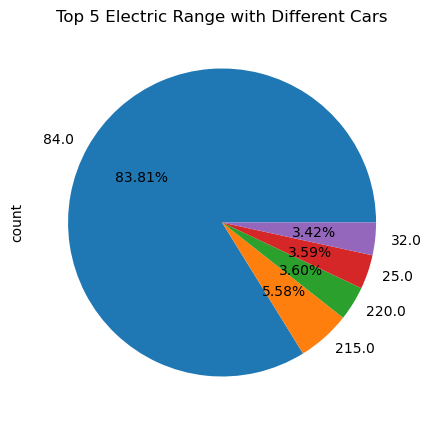

In [55]:
plt.rcParams["figure.figsize"]=[10,5]
df['Electric Range'].value_counts().head(5).plot(kind="pie",autopct="%.2f%%")
plt.title("Top 5 Electric Range with Different Cars")

plt.show()

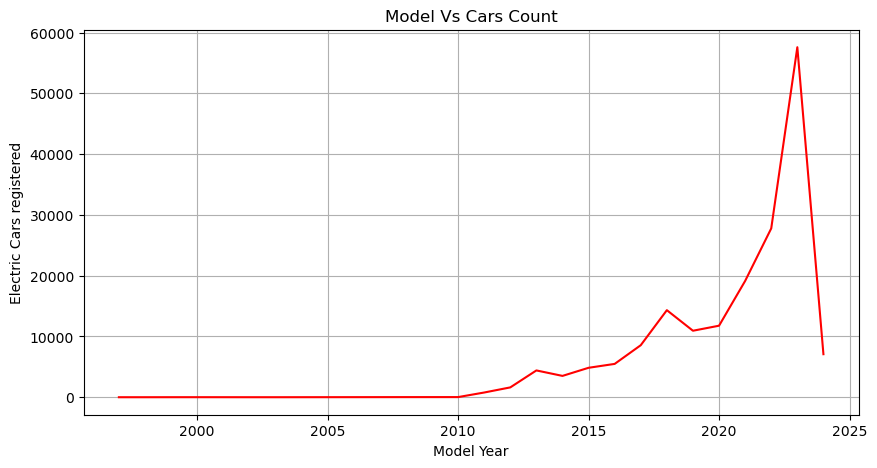

In [56]:
sns.lineplot(df['Model Year'].value_counts(),color="red")
plt.xlabel("Model Year")
plt.ylabel("Electric Cars registered")
plt.title("Model Vs Cars Count")
plt.grid()
plt.show()

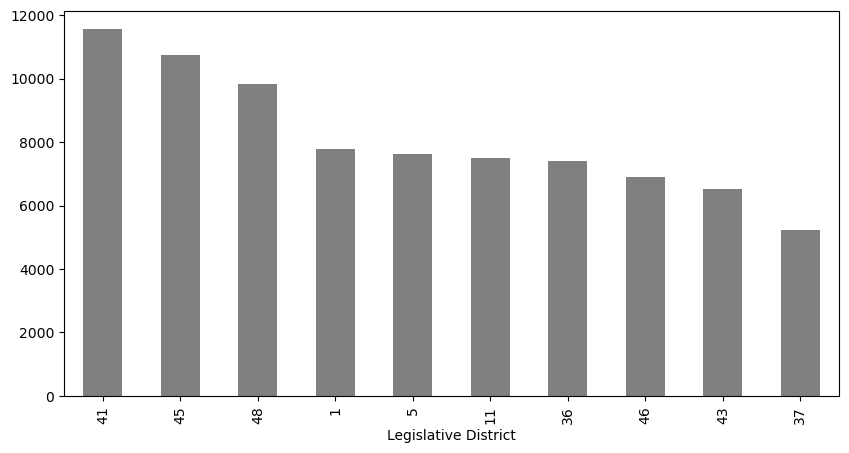

In [57]:
df['Legislative District'].value_counts().head(10).plot(kind="bar",color="grey")
plt.show()

### Univariate Analysis of Categorical Columns

In [59]:
cat

['VIN (1-10)',
 'County',
 'City',
 'State',
 'Model',
 'Electric Vehicle Type',
 'Clean Alternative Fuel Vehicle (CAFV) Eligibility',
 'Vehicle Location',
 'Brand',
 'Electric Utility Administration']

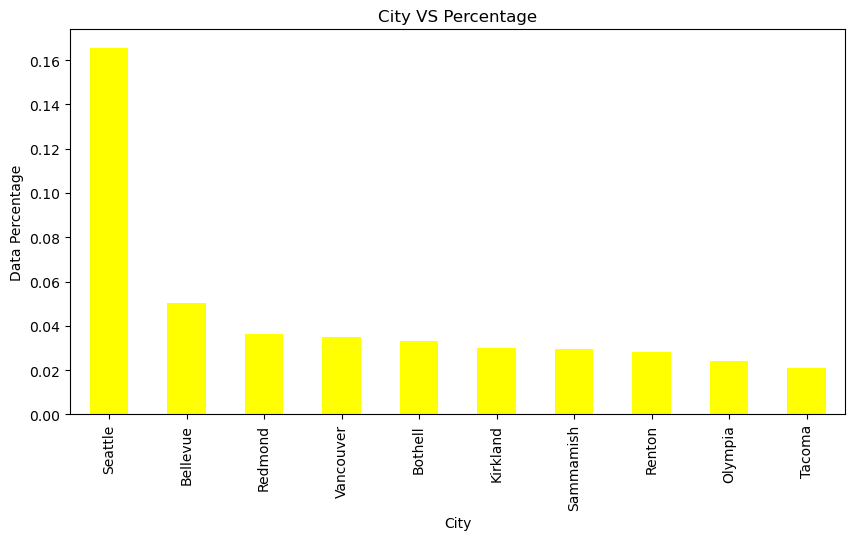

In [60]:
df['City'].value_counts(normalize=True).sort_values(ascending=False).head(10).plot(kind="bar",color="yellow")
plt.xlabel("City")
plt.ylabel("Data Percentage")
plt.title("City VS Percentage")
plt.show()

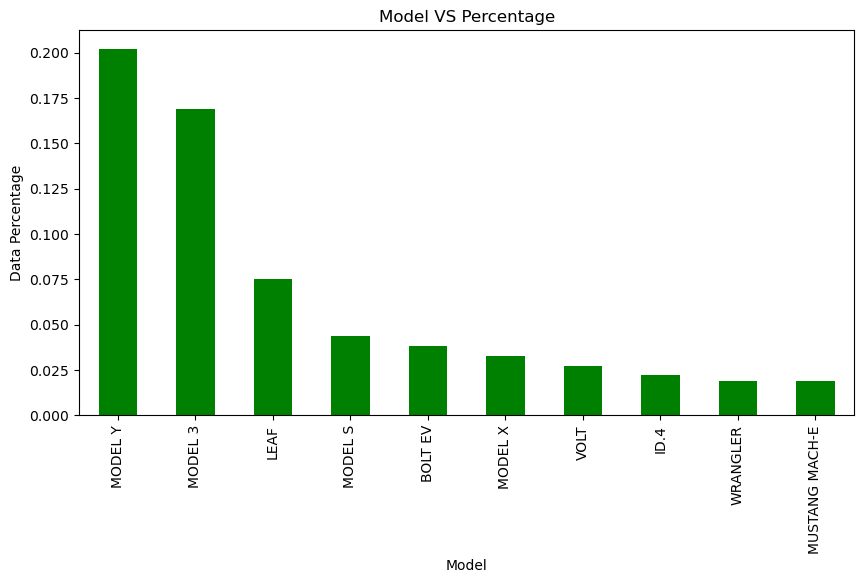

In [61]:
df['Model'].value_counts(normalize=True).sort_values(ascending=False).head(10).plot(kind="bar",color="green")
plt.xlabel("Model")
plt.ylabel("Data Percentage")
plt.title("Model VS Percentage")
plt.show()

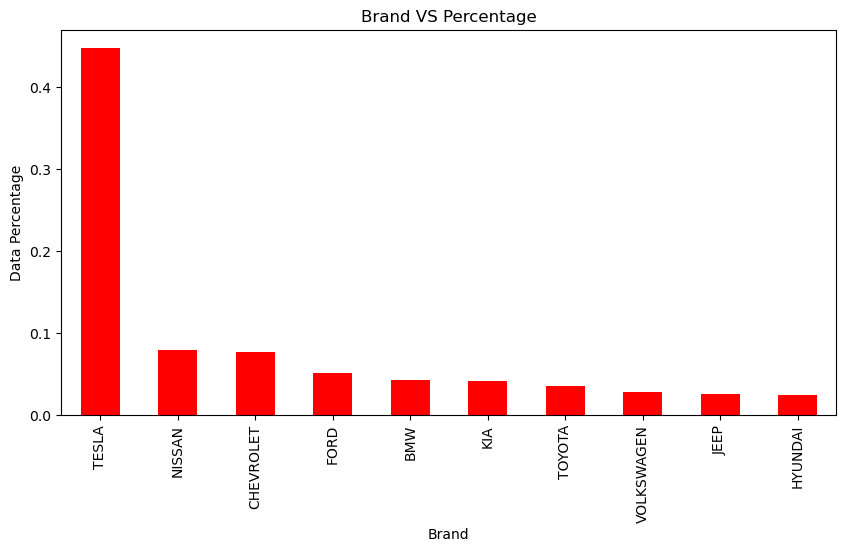

In [62]:
df['Brand'].value_counts(normalize=True).sort_values(ascending=False).head(10).plot(kind="bar",color="red")
plt.xlabel("Brand")
plt.ylabel("Data Percentage")
plt.title("Brand VS Percentage")
plt.show()

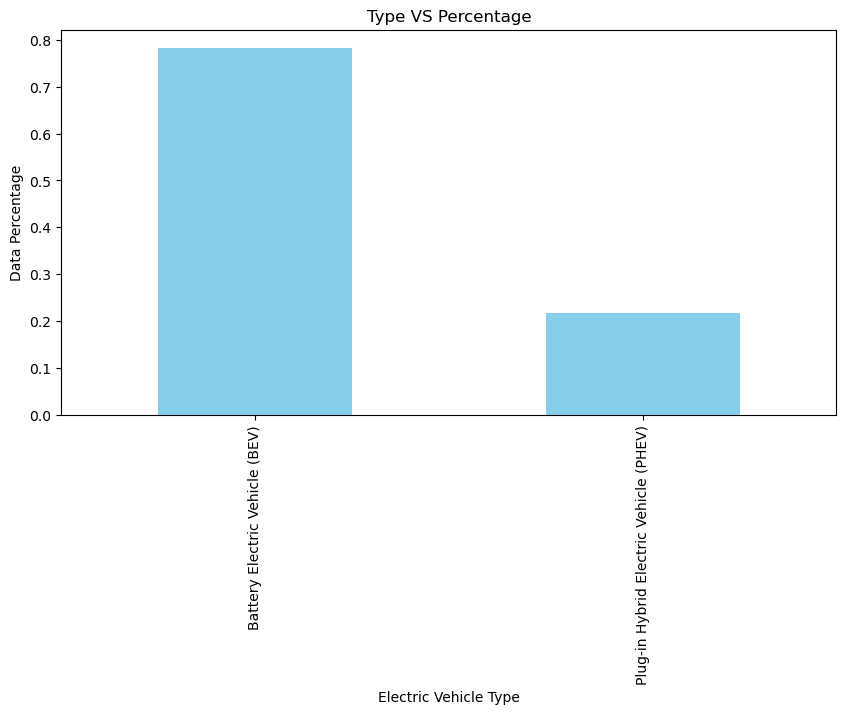

In [63]:
df['Electric Vehicle Type'].value_counts(normalize=True).plot(kind="bar",color="skyblue")
plt.xlabel("Electric Vehicle Type")
plt.ylabel("Data Percentage")
plt.title("Type VS Percentage")
plt.show()

# Bivariate Analysis

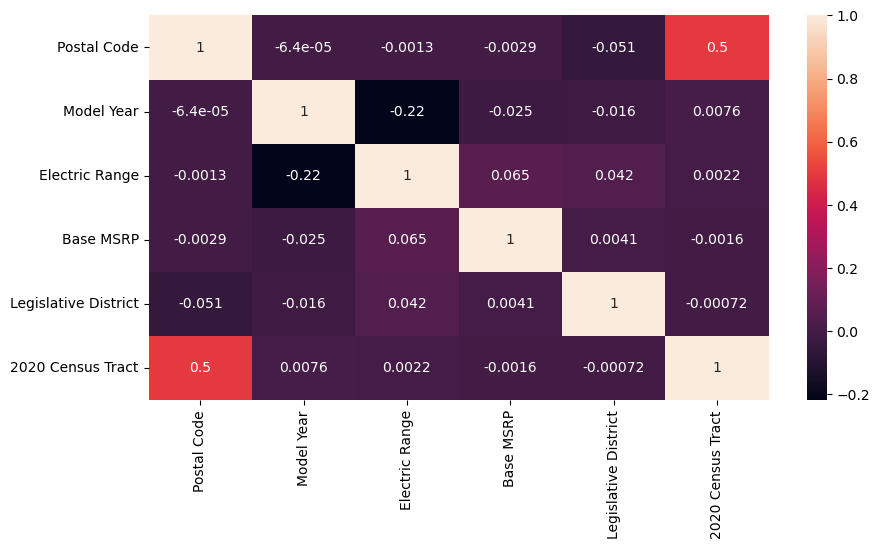

In [65]:
sns.heatmap(df[num].corr(),annot=True)
plt.show()

# Encoding 

In [67]:
for i in cat:
    print(i)
    print(df[i].unique())
    print("--------------------------------------")

VIN (1-10)
['5YJYGDEE1L' '7SAYGDEE9P' '5YJSA1E4XK' ... 'YV4BR00Z6N' '1C4RJYE62P'
 'WMEFK9BA7J']
--------------------------------------
County
['King' 'Snohomish' 'Kitsap' 'Thurston' 'Yakima' 'Island' 'Chelan'
 'Skagit' 'Spokane' 'Walla Walla' 'Grant' 'Stevens' 'Whitman' 'Kittitas'
 'Pend Oreille' 'Clark' 'Cowlitz' 'Jefferson' 'Clallam' 'Klickitat'
 'Pierce' 'Grays Harbor' 'Whatcom' 'Skamania' 'Wahkiakum' 'Washoe'
 'Benton' 'Franklin' 'Lewis' 'San Juan' 'Mason' 'Okanogan' 'Douglas'
 'Adams' 'Pacific' 'Asotin' 'District of Columbia' 'Columbia' 'Lincoln'
 'Kern' 'Cumberland' 'Oldham' 'Orange' 'Stafford' 'Montgomery' 'York'
 'Sonoma' 'San Diego' 'Marin' 'Ferry' 'Santa Clara' 'Contra Costa' 'Lake'
 "St. Mary's" 'Nueces' 'Platte' 'Los Angeles' 'DeKalb' 'Lee' 'Bexar'
 'Fairfax' 'Anne Arundel' 'Madison' 'Saratoga' 'Maricopa' 'Middlesex'
 'Mobile' 'Rockdale' 'Essex' 'Parker' 'El Paso' 'Honolulu' 'Tooele' 'Kent'
 'Alexandria' 'Autauga' "Prince George's" 'Cook' 'DuPage' 'Sacramento'
 'New Haven' 

In [68]:
df["Electric Vehicle Type"]=df["Electric Vehicle Type"].replace({"Battery Electric Vehicle (BEV)":0,"Plug-in Hybrid Electric Vehicle (PHEV)":1})

In [69]:
df["Electric Vehicle Type"].unique()

array([0, 1], dtype=int64)

In [70]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [71]:
cat

['VIN (1-10)',
 'County',
 'City',
 'State',
 'Model',
 'Electric Vehicle Type',
 'Clean Alternative Fuel Vehicle (CAFV) Eligibility',
 'Vehicle Location',
 'Brand',
 'Electric Utility Administration']

In [72]:
for i in ['VIN (1-10)',
 'County',
 'City',
 'State',
 'Model',
 'Vehicle Location',
 'Brand',
 'Electric Utility Administration']:
    df[i]=le.fit_transform(df[[i]])

In [73]:
for i in cat:
    print(i)
    print(df[i].unique())
    print("-----------------------------------")

VIN (1-10)
[ 4273  4806  3701 ... 10049   220  9060]
-----------------------------------
County
[ 78 162  80 175 192  72  29 160 165 182  58 171 186  81 124  32  39  74
  31  82 126  59 185 161 180 183  16  53  91 149  99 117  45   1 122  10
  44  36  92  77  40 118 120 170 107 194 164 148  97  52 152  37  84 169
 116 132  93  42  90  18  51   8  95 155  96 104 105 143  50 123  48  69
 176  76   4  12 135  38  46 145 111 125 108  21  23  47   2  70 131 178
 144  61  30  75 112  68 184  71 179 119 142 106 159  57 150  17  43   5
  67 151   6   3   9 146   0  28  79  35 129 113  26 163  27  22  65  83
 109  56 177  73  15 101 136  14 172 156 157 168  85 195  24 147  88 174
   7 103  64 134 115  33 153  87 191  49 139 128  98 133 137 181  55 140
 138 158  25 167  20 173 102 189  63  89 141 121 190 188 154  34  66 110
 193 130 127 100 114  60  11 166  41 187  94  86  19  13  54  62]
-----------------------------------
City
[569  56 279 627 720 718 491  30  32 350 447 517 635 305  62 580 52

In [74]:
df["Clean Alternative Fuel Vehicle (CAFV) Eligibility"]=df["Clean Alternative Fuel Vehicle (CAFV) Eligibility"].replace({"Clean Alternative Fuel Vehicle Eligible":1,"Eligibility unknown as battery range has not been researched":0,"Not eligible due to low battery range":0})

In [75]:
df["Clean Alternative Fuel Vehicle (CAFV) Eligibility"].unique()

array([1, 0], dtype=int64)

In [76]:
for i in df.columns:
    print(i)
    print(df[i].nunique())
    print("------------------------------------------")

VIN (1-10)
10830
------------------------------------------
County
196
------------------------------------------
City
723
------------------------------------------
State
46
------------------------------------------
Postal Code
863
------------------------------------------
Model Year
22
------------------------------------------
Model
139
------------------------------------------
Electric Vehicle Type
2
------------------------------------------
Clean Alternative Fuel Vehicle (CAFV) Eligibility
2
------------------------------------------
Electric Range
101
------------------------------------------
Base MSRP
30
------------------------------------------
Legislative District
49
------------------------------------------
Vehicle Location
861
------------------------------------------
2020 Census Tract
2116
------------------------------------------
Brand
40
------------------------------------------
Electric Utility Administration
22
------------------------------------------


In [77]:
for i in df.columns:
    print(i)
    print(df[i].unique())
    print("------------------------------------------")

VIN (1-10)
[ 4273  4806  3701 ... 10049   220  9060]
------------------------------------------
County
[ 78 162  80 175 192  72  29 160 165 182  58 171 186  81 124  32  39  74
  31  82 126  59 185 161 180 183  16  53  91 149  99 117  45   1 122  10
  44  36  92  77  40 118 120 170 107 194 164 148  97  52 152  37  84 169
 116 132  93  42  90  18  51   8  95 155  96 104 105 143  50 123  48  69
 176  76   4  12 135  38  46 145 111 125 108  21  23  47   2  70 131 178
 144  61  30  75 112  68 184  71 179 119 142 106 159  57 150  17  43   5
  67 151   6   3   9 146   0  28  79  35 129 113  26 163  27  22  65  83
 109  56 177  73  15 101 136  14 172 156 157 168  85 195  24 147  88 174
   7 103  64 134 115  33 153  87 191  49 139 128  98 133 137 181  55 140
 138 158  25 167  20 173 102 189  63  89 141 121 190 188 154  34  66 110
 193 130 127 100 114  60  11 166  41 187  94  86  19  13  54  62]
------------------------------------------
City
[569  56 279 627 720 718 491  30  32 350 447 517 635 

In [78]:
df1=df.drop(columns=["Clean Alternative Fuel Vehicle (CAFV) Eligibility","Electric Vehicle Type"],axis=1)

# Scaling 

In [80]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [81]:
for i in df1:
    df1[i]=sc.fit_transform(df1[[i]])

In [82]:
for i in df1.columns:
    print(i)
    print(df1[i].unique())
    print("------------------------------------------")

VIN (1-10)
[ 0.07755031  0.30057348 -0.16179163 ...  2.49440178 -1.61834633
  2.08057455]
------------------------------------------
County
[-0.46808994  1.46859247 -0.42197845  1.76831713  2.16026476 -0.6064244
 -1.59782134  1.42248098  1.5377597   1.92970733 -0.9292048   1.67609415
  2.0219303  -0.39892271  0.59247424 -1.52865411 -1.36726391 -0.56031291
 -1.55170986 -0.37586697  0.63858572 -0.90614905  1.99887456  1.44553672
  1.88359584  1.95276307 -1.897546   -1.04448351 -0.16836528  1.16886781
  0.01608066  0.43108404 -1.22892945 -2.24338214  0.54636275 -2.03588046
 -1.2519852  -1.43643114 -0.14530954 -0.49114568 -1.34420817  0.45413978
  0.50025126  1.65303841  0.20052661  2.20637624  1.51470395  1.14581207
 -0.03003082 -1.06753925  1.23803504 -1.4133754  -0.32975548  1.62998267
  0.40802829  0.77692018 -0.12225379 -1.29809668 -0.19142102 -1.85143451
 -1.090595   -2.08199194 -0.07614231  1.30720227 -0.05308657  0.13135938
  0.15441512  1.03053335 -1.11365074  0.56941849 -1.159762